## Avaliação geométrica de funções de transferência e esboço do diagrama do lugar das raízes

In [1]:
# !pip install plotly

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import plotly.graph_objs as go
from ipywidgets import FloatSlider, VBox, HBox, Label, interact

In [3]:
# Definição dos polos e zeros
zeros = np.array([-1 + 3j, -1 - 3j])
poles = np.array([-0.5, -2, -3.5, -2.5 + 2.5j, -2.5 - 2.5j])

# Função de transferência G(s)
def G(s, zeros, poles):
    numerator = np.prod([s - z for z in zeros])
    denominator = np.prod([s - p for p in poles])
    return numerator / denominator


# Criação da figura interativa
fig = go.FigureWidget()

# Adiciona polos e zeros
fig.add_trace(go.Scatter(x=np.real(zeros), y=np.imag(zeros), mode='markers',
              name='Zeros', marker=dict(color='blue', symbol='circle', size=10)))
fig.add_trace(go.Scatter(x=np.real(poles), y=np.imag(poles), mode='markers',
              name='Polos', marker=dict(color='red', symbol='x', size=10)))

# Adiciona o ponto s
s_trace = fig.add_trace(go.Scatter(
    x=[0], y=[0], mode='markers', name='s', marker=dict(color='green', size=10)))

# Adiciona setas dos polos e zeros para o ponto s
zero_lines = [fig.add_trace(go.Scatter(x=[np.real(z), 0], y=[np.imag(
    z), 0], mode='lines', line=dict(color='blue'))) for z in zeros]
pole_lines = [fig.add_trace(go.Scatter(x=[np.real(p), 0], y=[np.imag(
    p), 0], mode='lines', line=dict(color='red'))) for p in poles]

# Criação dos labels para módulo e argumento de G(s)
mod_label = Label(value="|L(s)|: 0")
arg_label = Label(value="arg(L(s)): 0")

# Atualização do ponto s, das setas e do valor de G(s)
def update_point_s(x, y):
    s = x + 1j * y
    G_s = G(s, zeros, poles)
    mod_G_s = np.abs(G_s)
    arg_G_s = np.angle(G_s)
    with fig.batch_update():
        fig.data[2].x = [x]  # Atualiza o ponto s (verde)
        fig.data[2].y = [y]
        for i, zero in enumerate(zeros):
            fig.data[3 + i].x = [np.real(zero), x]
            fig.data[3 + i].y = [np.imag(zero), y]
        for i, pole in enumerate(poles):
            fig.data[3 + len(zeros) + i].x = [np.real(pole), x]
            fig.data[3 + len(zeros) + i].y = [np.imag(pole), y]
    mod_label.value = f"|L(s)|: {mod_G_s:.2f}"
    arg_label.value = f"arg(L(s)): {np.degrees(arg_G_s):.2f}°"


# Sliders interativos
slider_x = FloatSlider(min=-5.0, max=5.0, step=0.01,
                       value=0.0, description='Re(s)')
slider_y = FloatSlider(min=-5.0, max=5.0, step=0.01,
                       value=0.0, description='Im(s)')

# Função para observar as mudanças nos sliders
def update(change):
    update_point_s(slider_x.value, slider_y.value)


slider_x.observe(update, names='value')
slider_y.observe(update, names='value')

# Layout do gráfico
fig.update_layout(title='Polos e Zeros da Função de Transferência',
                  xaxis_title='Re',
                  yaxis_title='Im',
                  xaxis=dict(range=[-5, 1]),
                  yaxis=dict(range=[-5, 5]),     
                  width=700,  # Largura do gráfico
                  height=700,  # Altura do gráfico
                  yaxis_scaleanchor="x"  # Mantém a proporção entre os eixos x e y
                  )

# Exibição dos sliders, labels e do gráfico
ui = VBox([slider_x, slider_y, mod_label, arg_label])
display(HBox([fig, ui]))

# Inicializa a posição do ponto s
update_point_s(0, 0)

    'data': [{'marker': {'color': 'blue', 'size': 10, 'symbol': 'circle'},
     …

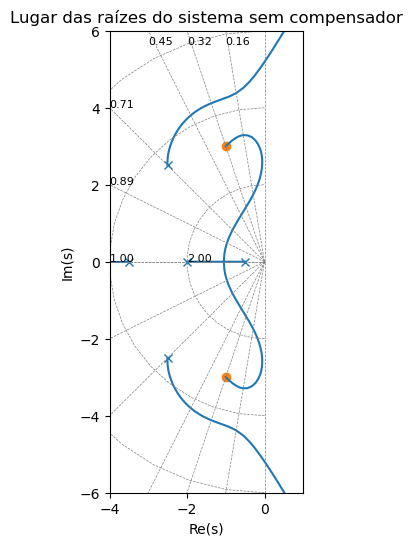

In [4]:
G_p = ct.tf(np.poly(zeros), np.poly(poles))

plt.figure(figsize=(2.5, 6))
rlist, klist = ct.root_locus(G_p, xlim=(-4, 1), ylim=(-6, 6))
plt.title("Lugar das raízes do sistema sem compensador")
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.show()

In [5]:
def update_root_locus(z, p):
    # Defina a função de transferência do compensador
    G_c = ct.TransferFunction([1, -z], [1, -p])

    # Função de transferência em malha aberta do sistema compensado
    G = G_p * G_c


    # Plot root locus de G
    plt.figure(figsize=(2.5, 6))
    ct.root_locus(G)
    # plt.legend()
    plt.title("Lugar das raízes do sistema com compensador")
    plt.xlabel('Re(s)')
    plt.ylabel('Im(s)')
    plt.ylim(-6, 6)  # Reaplica os limites do eixo y
    plt.xlim(-4, 1)  # Reaplica os limites do eixo x
    # plt.grid(True)
    plt.show()


# Configuração do widget
interact(update_root_locus,
         z=FloatSlider(value=-0.1, min=-3, max=0,
                       step=0.01, description='Zero (z)'),
         p=FloatSlider(value=-0.1, min=-3, max=0,
                       step=0.01, description='Polo (p)'))

interactive(children=(FloatSlider(value=-0.1, description='Zero (z)', max=0.0, min=-3.0, step=0.01), FloatSlid…

<function __main__.update_root_locus(z, p)>